<a href="https://colab.research.google.com/github/Swas99/Kaggle001/blob/master/Kaggle001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive', force_remount =True)

In [0]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Data Analysis

---



In [0]:
#Read Data
rawData = pd.read_csv('drive/My Drive/Kaggle001/train.csv')

In [6]:
#Print Column Names
colNames = list(rawData)
print(colNames)

numberOfNaNsInCols = []
totalRows = rawData.shape[0]

for i in range(len(colNames)):
    numberOfNaNsInCols.append(totalRows - rawData[pd.notnull(rawData[colNames[i]])].shape[0])

print("Column Name\t\t\tCount Of Unique Values / Number Of Missing Values")
for i in range(len(colNames)):
  print(str(colNames[i]) + " \t\t\t\t" + str(rawData[colNames[i]].unique().shape[0]) + " / " + str(numberOfNaNsInCols[i]))
    
    
# Gather Columns With Missing Value
missingValueCols = []
for i in range(len(colNames)):
  if numberOfNaNsInCols[i] > 0 :
    missingValueCols.append(colNames[i])

print("\nMissing Value Cols: ")
print(missingValueCols)

numericalMissingDataHeader = []
numericalMissingDataMissingCount = []
categoricalMissingDataHeader = []
categoricalMissingDataMissingCount = []

print("Numerical Missing Data")
for i in range(len(colNames)):
  if numberOfNaNsInCols[i]>0:
    if rawData[colNames[i]].unique().shape[0]>8: 
      numericalMissingDataHeader.append(colNames[i])
      numericalMissingDataMissingCount.append(numberOfNaNsInCols[i])
      print(str(colNames[i]) +  " : " + str(numberOfNaNsInCols[i]))
      
print("\nCategorical Missing Data")
for i in range(len(colNames)):
  if numberOfNaNsInCols[i]>0:
    if rawData[colNames[i]].unique().shape[0]<8:
      categoricalMissingDataHeader.append(colNames[i])
      categoricalMissingDataMissingCount.append(numberOfNaNsInCols[i])
      print(str(colNames[i]) +  " : " + str(numberOfNaNsInCols[i]))

['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'scalar_coupling_constant']
Column Name			Count Of Unique Values / Number Of Missing Values
id 				4658147 / 0
molecule_name 				85003 / 0
atom_index_0 				29 / 0
atom_index_1 				29 / 0
type 				8 / 0
scalar_coupling_constant 				2182935 / 0

Missing Value Cols: 
[]
Numerical Missing Data

Categorical Missing Data


# Not used now

In [9]:
data_1 = pd.read_csv('drive/My Drive/Kaggle001/structures.csv')
print(data_1.head())

      molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397


In [0]:
# def addMCData(colStart):
  
#   rawData["A1"] = np.nan
#   rawData["A1x"] = np.nan
#   rawData["A1y"] = np.nan
#   rawData["A1z"] = np.nan
#   rawData["A2"] = np.nan
#   rawData["A2x"] = np.nan
#   rawData["A2y"] = np.nan
#   rawData["A2z"] = np.nan
  
  
#   for index, i in rawData.iterrows():
#     i.A1 = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_0)].atom[1]
#     i.A1x = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_0)].x[1]
#     i.A1y = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_0)].y[1]
#     i.A1z = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_0)].z[1]
#     i.A2 = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_1)].atom[1]
#     i.A2x = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_1)].x[1]
#     i.A2y = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_1)].y[1]
#     i.A2z = data_1.loc[(data_1['molecule_name'] == i['molecule_name']) & (data_1['atom_index'] == i.atom_index_1)].z[1]
    
    
#   print(rawData)
# #     rawData[]
# #     i['colStart'] = data_1[i.molecule_name == data_1.molecule_name and data_1.atom_index == i.atom_index_0].atom
# #     data_1[i.molecule_name == data_1.molecule_name and data_1.atom_index == i.atom_index_0].x
# #     data_1[i.molecule_name == data_1.molecule_name and data_1.atom_index == i.atom_index_0].y
# #     data_1[i.molecule_name == data_1.molecule_name and data_1.atom_index == i.atom_index_0].z
    
    
    
    
# addMCData(len(list(rawData))+1)
  
  

# Data Processing

In [0]:
rawData = pd.read_csv('drive/My Drive/Kaggle001/train.csv')

In [0]:

molecule_names = rawData.molecule_name.unique()
molecule_names_dict = dict(zip(molecule_names, range(len(molecule_names))))
rawData = rawData.applymap(lambda s: molecule_names_dict.get(s) if s in molecule_names_dict else s)

m_type = rawData.type.unique()
m_type_dict = dict(zip(m_type, range(len(m_type))))
rawData = rawData.applymap(lambda s: m_type_dict.get(s) if s in m_type_dict else s)

In [0]:

def createValDataSetForValidation(rawData, fraction):
  df1 = rawData
#   for i in range(len(colNames)):
#     df1 = removeNaNsFromRows(df1,colNames[i])

  df1 = df1.sample(frac=1).reset_index(drop=True)
  df1 = df1.sample(frac=1).reset_index(drop=True)
  
  validationSet = df1.head(int(df1.shape[0] * fraction))
  
  return validationSet

In [0]:
validationSet = createValDataSetForValidation(rawData, .1)
rawData = rawData.drop(validationSet.id)
rawData = rawData.reset_index(drop=True)
validationSet = validationSet.reset_index(drop=True)

In [0]:
TEST_DATA = pd.read_csv('drive/My Drive/Kaggle001/test.csv')

In [0]:
TEST_DATA = TEST_DATA.applymap(lambda s: m_type_dict.get(s) if s in m_type_dict else s)
TEST_DATA = TEST_DATA.applymap(lambda s: molecule_names_dict.get(s) if s in molecule_names_dict else s)

In [0]:
# m_type = testData.type.unique()
molecule_names = TEST_DATA.molecule_name.unique()
# m_type_dict = dict(zip(m_type, range(len(m_type))))
molecule_names_dict = dict(zip(molecule_names, range(len(molecule_names))))
TEST_DATA = TEST_DATA.applymap(lambda s: molecule_names_dict.get(s) if s in molecule_names_dict else s)

# Prediction

In [0]:
# ['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'scalar_coupling_constant']
targetCol = ['scalar_coupling_constant']
featureCols = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type']


_X1 =  pd.DataFrame()
_X2 =  pd.DataFrame()

In [56]:
def fitLinearRegression(rawData, testDataSet, featureCols, targetCol):
     
  scaler = StandardScaler()
  
  X = rawData[featureCols]
  y = rawData[targetCol]
  x_train_scaled = scaler.fit_transform(X)
  X = pd.DataFrame(x_train_scaled)
  
  lm = linear_model.LinearRegression()
  model = lm.fit(X,y)
  
  print(lm.intercept_)
  
  print(featureCols)
  print(lm.coef_)
  
  y_test = testDataSet[targetCol]
  y_pred = lm.predict(testDataSet[featureCols])
  
  print(metrics.mean_absolute_error(y_test, y_pred))
  print(metrics.mean_squared_error(y_test, y_pred))
  print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
  
  
  PRED = lm.predict( scaler.fit_transform(X))
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])
  _X1.insert(0, '1', __Y['1'])
 
  PRED = lm.predict( scaler.fit_transform(TEST_DATA[featureCols]))
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])  
  _X2.insert(0, '1', __Y['1'])
  
#   PRED = lm.predict( scaler.fit_transform(TEST_DATA[featureCols]))
#   ans = pd.DataFrame(TEST_DATA['id'])
#   ans.insert(1, 'scalar_coupling_constant', PRED)
#   ans.to_csv('drive/My Drive/Kaggle001/submission.csv', sep=',', index=False, encoding='utf-8')
  

  
fitLinearRegression(rawData, validationSet, featureCols , targetCol)


[15.91522116]
['molecule_name', 'atom_index_0', 'atom_index_1', 'type']
[[ -0.74300628   3.3397731   -9.26633542 -24.36558339]]
32780.74145233884
1376366532.1170652
181.05452618572903


In [57]:
def fitRegTModel(rawData, testDataSet, featureCols , targetCol):
  
  y = rawData[targetCol]
  X = rawData[featureCols]
  
  
  regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=17) 
  regression_model.fit(X,y)
  
  y_test = testDataSet[targetCol]
  y_pred = regression_model.predict(testDataSet[featureCols])
  
  print(metrics.mean_absolute_error(y_test, y_pred))
  print(metrics.mean_squared_error(y_test, y_pred))
  print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))) 
  
  PRED = regression_model.predict(X)
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])
  _X1.insert(1, '2', __Y['1']) 
  
  PRED = regression_model.predict(TEST_DATA[featureCols])
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])  
  _X2.insert(1, '2', __Y['1'])
#   PRED = regression_model.predict(TEST_DATA[featureCols])
#   ans = pd.DataFrame(TEST_DATA['id'])
#   ans.insert(1, 'scalar_coupling_constant', PRED)
#   ans.to_csv('drive/My Drive/Kaggle001/submission.csv', sep=',', index=False, encoding='utf-8')
  
  
  
fitRegTModel(rawData, validationSet, featureCols , targetCol)


2.9033279193621375
32.88790497418383
1.7039154671996313


In [58]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


def rfr_model(testDataSet, X, y):
  regression_model = RandomForestRegressor(criterion="mse",min_samples_leaf=17) 
  regression_model.fit(X,y)
  
  y_test = testDataSet[targetCol]
  y_pred = regression_model.predict(testDataSet[featureCols])
  
  print(metrics.mean_absolute_error(y_test, y_pred))
  print(metrics.mean_squared_error(y_test, y_pred))
  print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred))) 
   
  PRED = regression_model.predict(X)
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])
  _X1.insert(2, '3', __Y['1'])
  _X1.insert(3, '4', __Y['1'])
  
  PRED = regression_model.predict(TEST_DATA[featureCols])
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])  
  _X2.insert(2, '3', __Y['1'])
  _X2.insert(3, '4', __Y['1'])
  
#   PRED = regression_model.predict(TEST_DATA[featureCols])
#   ans = pd.DataFrame(TEST_DATA['id'])
#   ans.insert(1, 'scalar_coupling_constant', PRED)
#   ans.to_csv('drive/My Drive/Kaggle001/submission.csv', sep=',', index=False, encoding='utf-8')
  
  
rfr_model(validationSet, rawData[featureCols], rawData[targetCol])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


2.9192077428977488
32.677551250490026
1.7085689166368878


In [59]:
def fitRidgeRegression(rawData, testDataSet, featureCols, targetCol):
     
  scaler = StandardScaler()
  
  X = rawData[featureCols]
  y = rawData[targetCol]
  x_train_scaled = scaler.fit_transform(X)
  X = pd.DataFrame(x_train_scaled)
  
  lm = linear_model.BayesianRidge()
  model = lm.fit(X,y)
  
  print(lm.intercept_)
  print(featureCols)
  print(lm.coef_)
  
  y_test = testDataSet[targetCol]
  y_pred = lm.predict(testDataSet[featureCols])
  
  print(metrics.mean_absolute_error(y_test, y_pred))
  print(metrics.mean_squared_error(y_test, y_pred))
  print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
  
  
  PRED = lm.predict( scaler.fit_transform(X))
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])
  _X1.insert(4, '5', __Y['1'])
  
  PRED = regression_model.predict(TEST_DATA[featureCols])
  __Y = pd.DataFrame(data = np.array(PRED), columns=['1'])  
  _X2.insert(4, '5', __Y['1'])
  
  
#   ans = pd.DataFrame(TEST_DATA['id'])
#   ans.insert(1, 'scalar_coupling_constant', PRED)
#   ans.to_csv('drive/My Drive/Kaggle001/submission.csv', sep=',', index=False, encoding='utf-8')
  

  
fitRidgeRegression(rawData, validationSet, featureCols , targetCol)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.915221155464279
['molecule_name', 'atom_index_0', 'atom_index_1', 'type']
[ -0.74300488   3.33976793  -9.26632652 -24.36556358]
32780.67980140038
1376361352.4917853
181.05435593047847


#Stacking

In [60]:

_X1.insert(5, 'O', rawData[targetCol])
print(_X1.head())

           1          2          3          4          5        O
0  44.505883  -9.705714 -10.289466 -10.289466  44.505867 -11.2570
1  42.650321  -9.705714 -10.289466 -10.289466  42.650306 -11.2548
2  40.794758  -9.705714 -10.289466 -10.289466  40.794745 -11.2543
3  60.163921  87.674163  87.138232  87.138232  60.163890  84.8074
4  43.672469  -9.705714 -10.289466 -10.289466  43.672453 -11.2541


In [61]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


X = _X1[['1','2','3','4','5']]
y = _X1[['O']]
regression_model = RandomForestRegressor(criterion="mse") 
regression_model.fit(X,y)

y_pred = regression_model.predict(X)
print(metrics.mean_absolute_error(y, y_pred))
print(metrics.mean_squared_error(y, y_pred))
print(np.sqrt(metrics.mean_absolute_error(y, y_pred))) 


PRED = regression_model.predict(_X2)
ans = pd.DataFrame(TEST_DATA['id'])
ans.insert(1, 'scalar_coupling_constant', PRED)
ans.to_csv('drive/My Drive/Kaggle001/submission.csv', sep=',', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.8682515137464033
3.775865445467907
0.9318001468911685


In [62]:
print(len(ans))
print(ans.head())

2505542
        id  scalar_coupling_constant
0  4658147                  6.869432
1  4658148                116.049120
2  4658149                  6.573565
3  4658150                 93.760930
4  4658151                 -6.756916


#Finding min_samples_leaf

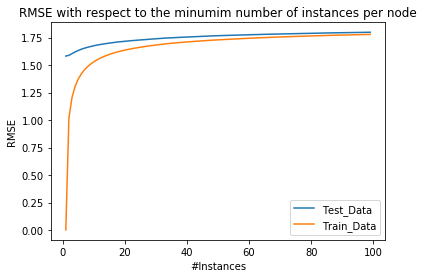

In [0]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 

y = rawData[targetCol]
X = rawData[featureCols]
y_test = validationSet[targetCol]

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,100):
  #Paramterize the model and let i be the number of minimum instances per leaf node
  regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
  #Train the model
  regression_model.fit(X,y)
  #Predict query instances
  predicted_train = regression_model.predict(X)
  predicted_test = regression_model.predict(validationSet[featureCols])
  #Calculate and append the RMSEs
  RMSE_train.append(np.sqrt(metrics.mean_absolute_error(y, predicted_train)))
  RMSE_test.append(np.sqrt(metrics.mean_absolute_error(y_test, predicted_test)))

ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

2.9169118501208255
33.012601179676075
1.707896908516678
